In [86]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Rescaling,Resizing, RandomFlip, RandomRotation



In [87]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [89]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [90]:
len(dataset)

68

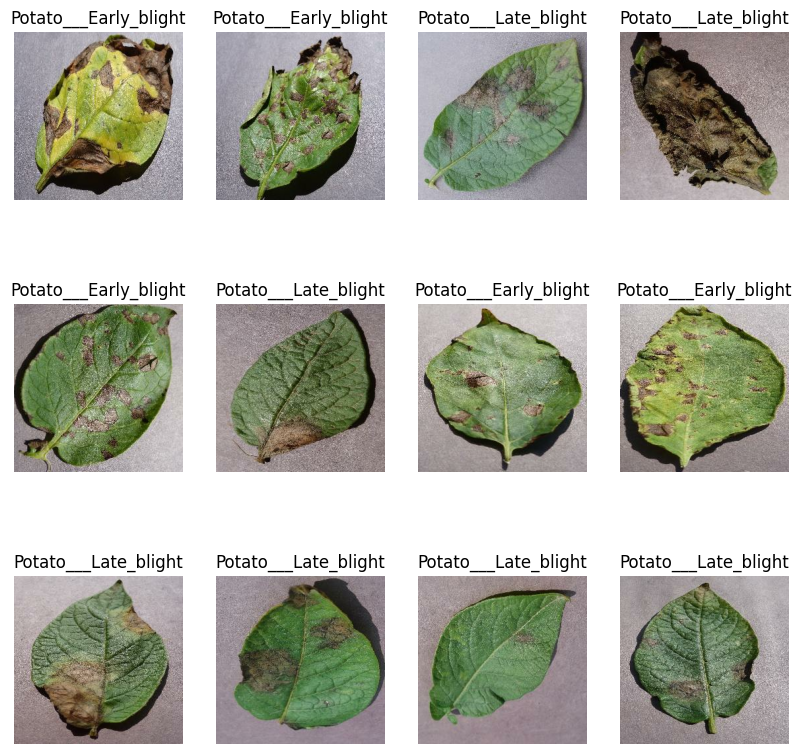

In [91]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("int"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [92]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [93]:
train_ds = dataset.take(54)
len(train_ds)

54

In [94]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [95]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [96]:
len(train_ds)

54

In [97]:
len(val_ds)
len(test_ds)

8

In [98]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [99]:
resize_and_rescale  = tf.keras.Sequential([
    Rescaling(1.0/255),
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
])

In [100]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

In [101]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax"),
])

model.build(input_shape = input_shape)

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 3)                │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,387 (782.76 KB)

 Trainable params: 200,387 (782.76 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [104]:
history =  model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 825ms/step - accuracy: 0.5045 - loss: 0.9107 - val_accuracy: 0.7604 - val_loss: 0.6177
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 718ms/step - accuracy: 0.7837 - loss: 0.4947 - val_accuracy: 0.8542 - val_loss: 0.3786
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 682ms/step - accuracy: 0.8450 - loss: 0.4003 - val_accuracy: 0.8802 - val_loss: 0.3029
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.8734 - loss: 0.3098 - val_accuracy: 0.8958 - val_loss: 0.2585
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 639ms/step - accuracy: 0.8969 - loss: 0.2437 - val_accuracy: 0.8490 - val_loss: 0.3719
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 611ms/step - accuracy: 0.8998 - loss: 0.2377 - val_accuracy: 0.8958 - val_loss: 0.2601
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 690ms/step - accuracy: 0.9141 - loss: 0.2055 - val_accuracy: 0.9167 - val_loss: 0.2703
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 657ms/step - accuracy: 0.9324 - loss: 0.1653 - val_accu

In [105]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.9910 - loss: 0.0205


In [106]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [107]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

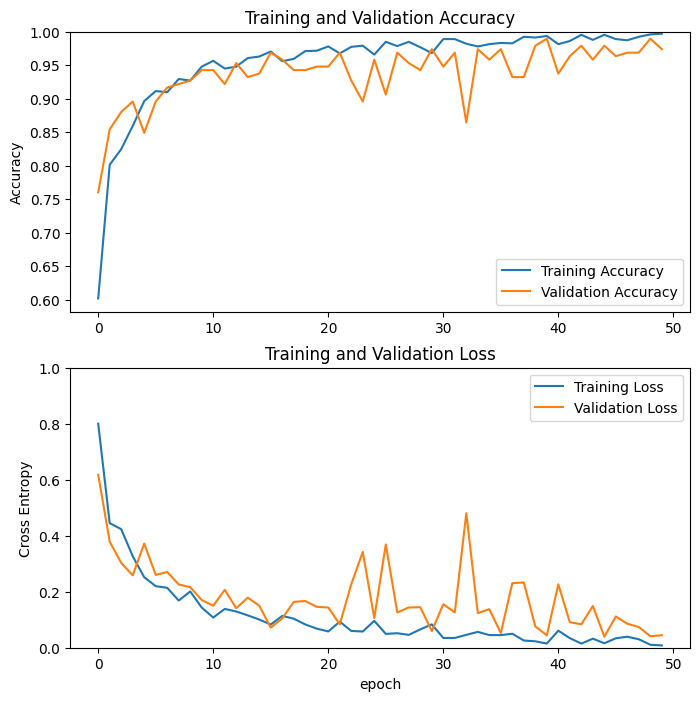

In [109]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
predicted label: Potato___healthy


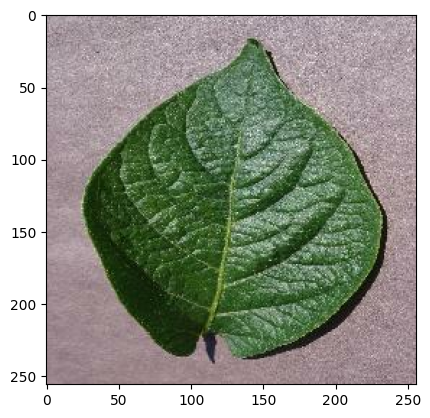

In [110]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('int')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [111]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


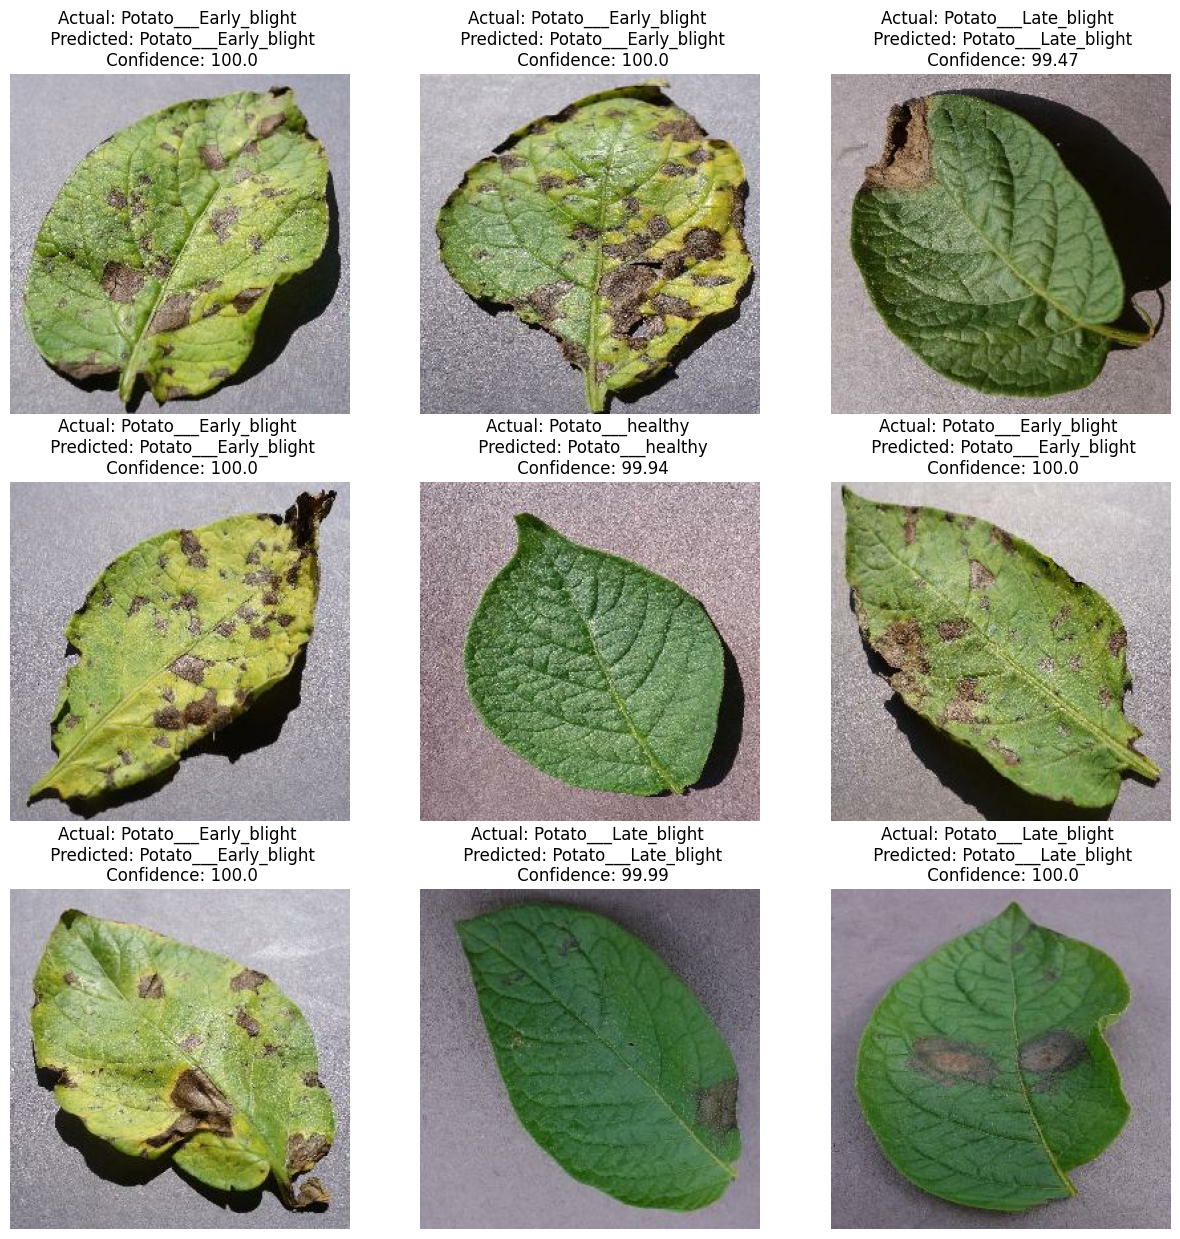

In [112]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}\n Confidence: {confidence}")
        plt.axis("off")

In [120]:
import os
import tensorflow as tf

# Path to the saved_models directory
save_dir = 'D:/capstone/project/saved_models'

# List of existing model files in the directory
model_files = [i for i in os.listdir(save_dir) if i.endswith('.keras') and i.startswith('Keras')]

# Extract version numbers from filenames
model_versions = []
for filename in model_files:
    # Remove 'Keras' prefix and '.keras' suffix
    version_str = filename.replace('Keras', '').replace('.keras', '')
    if version_str.isdigit():
        model_versions.append(int(version_str))

# Determine the next model version number
if model_versions:
    model_version = max(model_versions) + 1
else:
    model_version = 1

# Define the path to save the new model in .keras format
model_save_path = os.path.join(save_dir, f"Keras{model_version}.keras")

# Save the model in .keras format
model.save(model_save_path)
print(f"Model saved successfully in .keras format at: {model_save_path}")

# Load the model to verify
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

# Define the path to save the model in SavedModel format
saved_format_save_path = os.path.join(save_dir, f"{model_version}")

model.export(saved_format_save_path)
print(f"Model saved successfully in SavedModel format at: {saved_format_save_path}")

Model saved successfully in .keras format at: D:/capstone/project/saved_models\Keras4.keras
Model loaded successfully.
INFO:tensorflow:Assets written to: D:/capstone/project/saved_models\4\assets


INFO:tensorflow:Assets written to: D:/capstone/project/saved_models\4\assets


Saved artifact at 'D:/capstone/project/saved_models\4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_2308')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1492837704784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849008208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849012240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849011088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849010896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849010320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1493878880784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849007440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849011664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1492849007632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14928490080